## Analyzing housing prices can be a good exercise in data science, since it provides plenty of opportunities to experiment with various numerical (monetary values, coordinates etc.) and categorical (different kinds of amenities, neighborhoods, etc.) variables

### The dataset used in this project contains 1903 entries of the various housing information of the properties located in Dubai, United Arab Emirates

### We will use this dataset to do data exploration, data cleaning, model implementation as well as perform the fine tuning and use it to create the final model that will predict housing prices 

## Setup

In [108]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Import main packages
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setup the saving directory
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Get the Data

### Import the Data

In [109]:
dubai = pd.read_csv('C:\property.csv', index_col=0)

### Look at the Data Structure

In [110]:
dubai.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049.0,Palm Jumeirah,25.113208,55.138932,2700000,NaN,2502.32,1.0,2.0,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529.0,Palm Jumeirah,25.106809,55.151201,2850000,1582.0,1801.52,2.0,2.0,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542.0,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951.0,589.44,3.0,5.0,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063.0,Culture Village,25.227295,55.341761,2850000,2020.0,1410.89,2.0,3.0,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778.0,Palm Jumeirah,25.114275,55.139764,1729200,507.0,3410.65,0.0,1.0,Medium,...,False,True,True,True,True,False,False,True,True,False


In [111]:
dubai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1810 non-null   float64
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1676 non-null   float64
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1810 non-null   float64
 8   no_of_bathrooms      1734 non-null   float64
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [112]:
dubai["neighborhood"].value_counts()

Downtown Dubai                       302
Dubai Marina                         288
Jumeirah Village Circle              200
Palm Jumeirah                        178
Jumeirah Beach Residence             116
Business Bay                          97
Jumeirah Lake Towers                  70
Dubai Hills Estate                    53
The Views                             47
Jumeirah                              39
Dubai Creek Harbour (The Lagoons)     38
Mohammed Bin Rashid City              31
DIFC                                  31
Greens                                30
Dubai Harbour                         30
Motor City                            27
Town Square                           27
Dubai Sports City                     25
Al Furjan                             23
DAMAC Hills                           21
Old Town                              17
Meydan                                17
City Walk                             14
Umm Suqeim                            13
Dubai Silicon Oa

In [113]:
dubai["quality"].value_counts()

Medium    1146
Low        544
High       134
Ultra       81
Name: quality, dtype: int64

In [114]:
dubai.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1.810000e+03,1905.000000,1905.000000,1.905000e+03,1676.000000,1905.000000,1810.000000,1734.000000
mean,7.572245e+06,25.116538,55.212338,2.085830e+06,1414.770286,1327.243785,1.792818,2.511534
std,1.946124e+05,0.062647,0.068794,2.913200e+06,898.773118,668.473559,0.947286,1.056202
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000
25%,7.559838e+06,25.072791,55.145389,8.900000e+05,838.000000,870.920000,1.000000,2.000000
50%,7.630968e+06,25.096700,55.207506,1.400000e+06,1268.500000,1169.590000,2.000000,2.000000
75%,7.670067e+06,25.188130,55.271797,2.200000e+06,1694.500000,1622.500000,2.000000,3.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000


<AxesSubplot:>

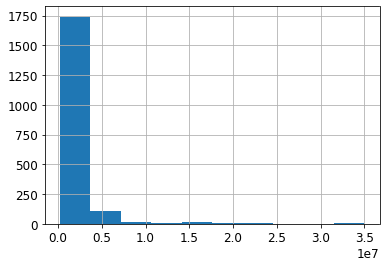

In [115]:
dubai["price"].hist()

Saving figure attribute_histogram_plots


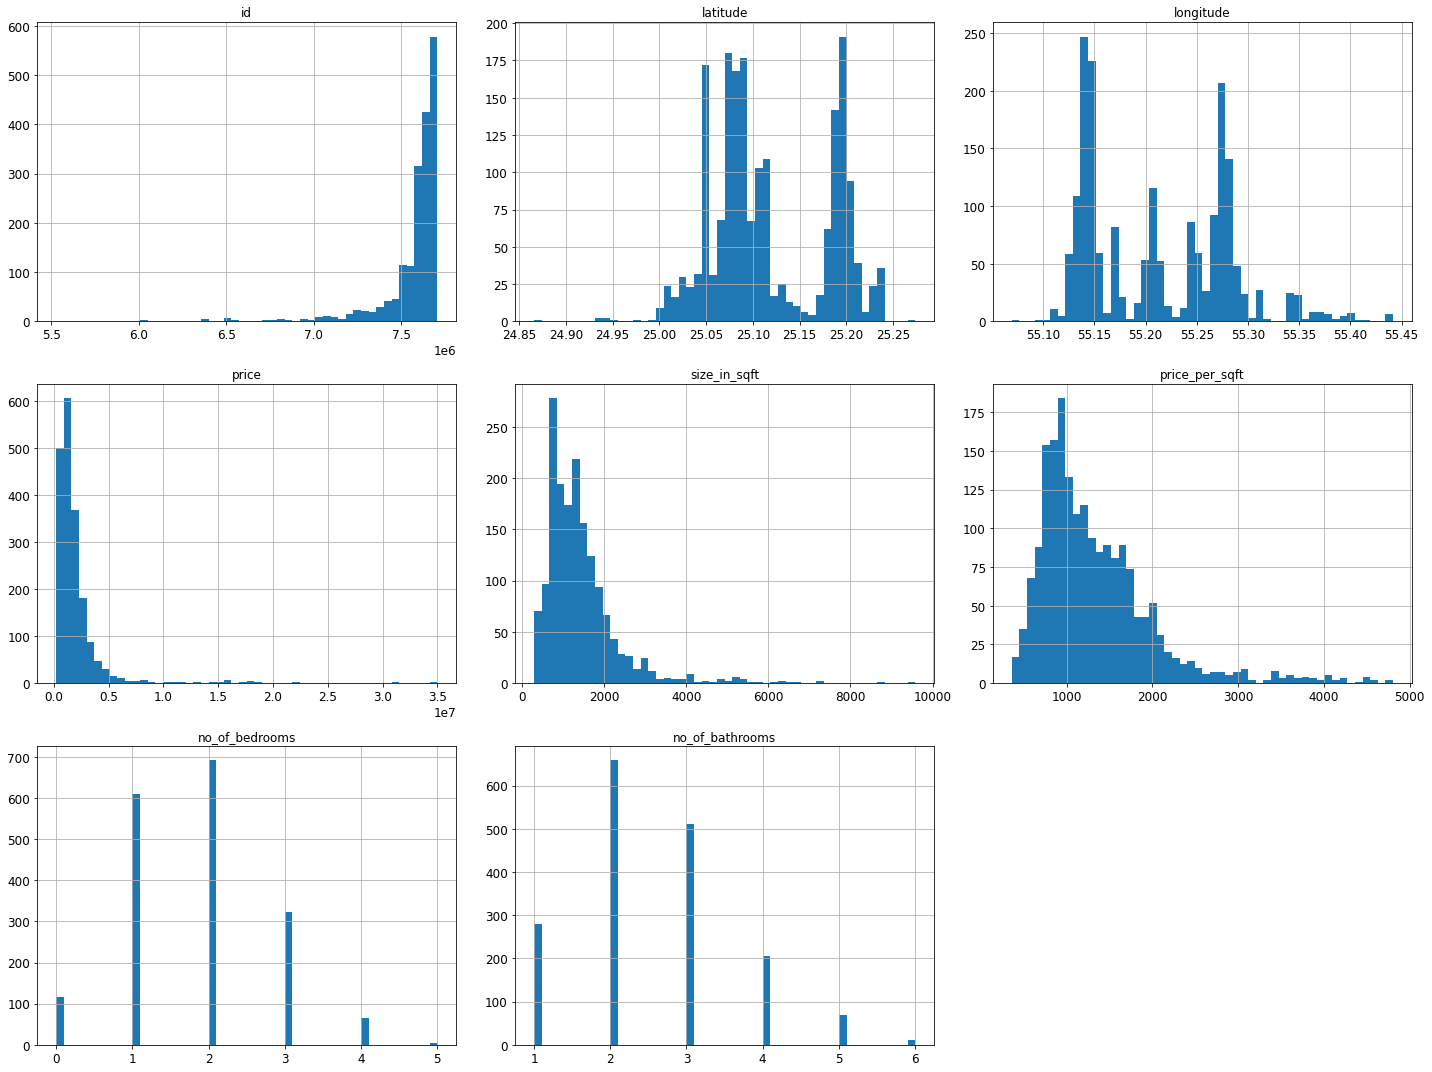

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
dubai.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### Let's take a look at the relationship between the prices and the neighborhoods

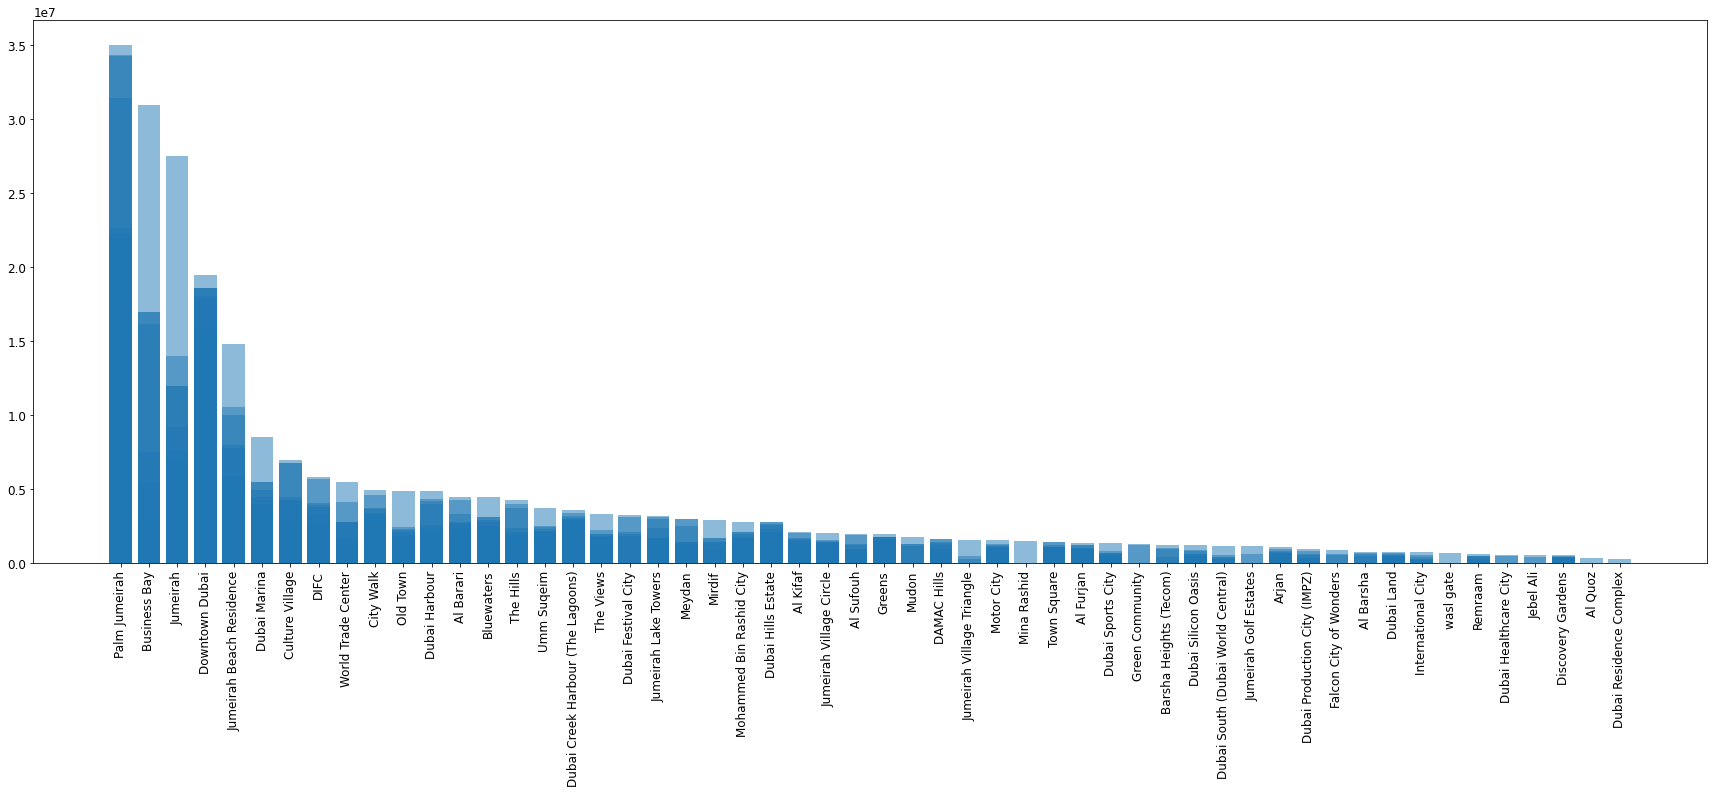

In [117]:
neighborhood_price = dubai[['price', 'neighborhood']].sort_values(by=['price'], ascending = False)

plt.figure(figsize = (30, 10))
plt.bar(neighborhood_price.neighborhood, neighborhood_price.price, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.show()

### Now, let's visualize relationship between the price per square footage and the neighborhoods

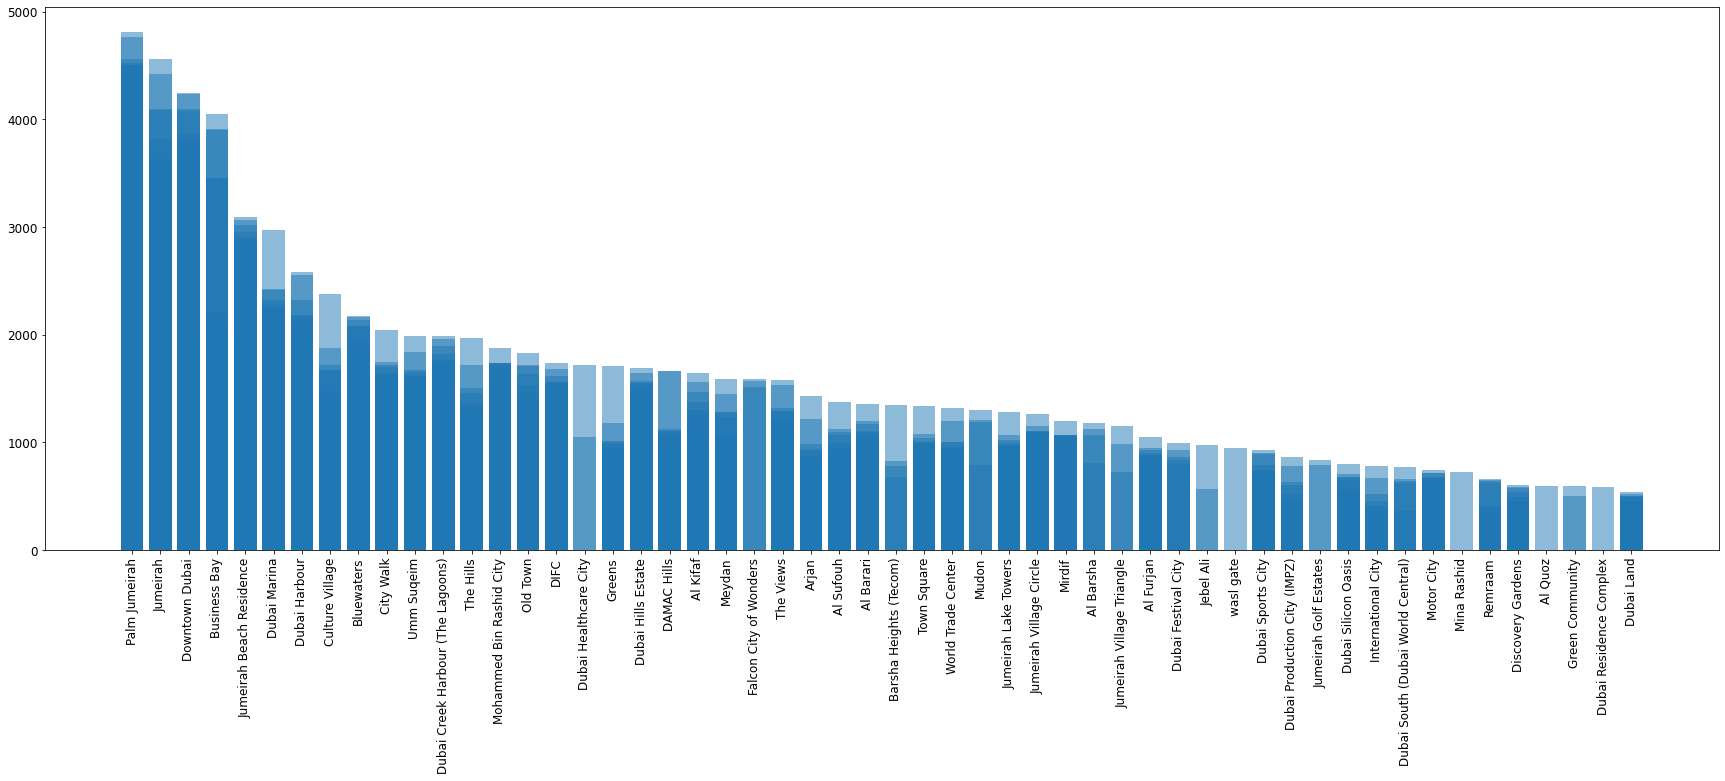

In [118]:
neighborhood_price_per_sqft = dubai[['price_per_sqft', 'neighborhood']].sort_values(by=['price_per_sqft'], ascending = False)

plt.figure(figsize = (30, 10))
plt.bar(neighborhood_price_per_sqft.neighborhood, neighborhood_price_per_sqft.price_per_sqft, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.show()

## Further visualization

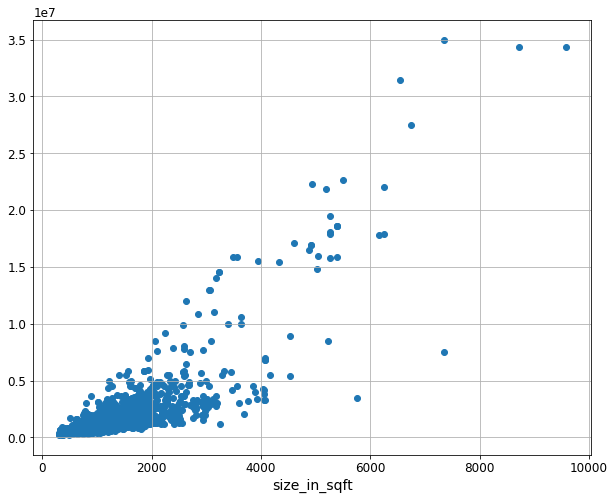

In [16]:
#relationship between the size in square feet and the price
plt.figure(figsize = (10, 8))

feature = 'size_in_sqft'
plt.scatter(dubai[feature], dubai['price'])
plt.xlabel('size_in_sqft')
plt.grid(True)


### Visualizing the observations on the map can help us get a more practical perspective on the given dataset

In [119]:
# note: geopy and folium were installed through pip install in the command prompt of Anaconda
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

address = 'Dubai, United Arab Emirates'
geolocator = Nominatim(user_agent="data_regress_project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

data = dubai[['latitude', 'longitude', 'price']].values

# create map of Dubai using latitude and longitude values
map_dubai_re = folium.Map(location = [latitude, longitude], control_scale=True, zoom_start = 12)

# add markers to map
for lat, lng, neighborhood in zip(dubai['latitude'], dubai['longitude'], dubai['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 2,
        popup=label,
        color='b',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_dubai_re)  
    
radius = 15
hm = HeatMap(
    data,
    radius=radius,
    blur=30
)
hm.add_to(map_dubai_re)
    
map_dubai_re

## Looking for Correlations

#### All of these methods of displaying correlations will help us during the next step

In [18]:
corr_matrix = dubai.corr()

In [19]:
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
size_in_sqft           0.808354
price_per_sqft         0.705538
no_of_bedrooms         0.510942
no_of_bathrooms        0.497290
private_pool           0.325857
latitude               0.206775
concierge              0.113217
maid_room              0.109675
private_gym            0.089794
view_of_water          0.088400
private_jacuzzi        0.073879
private_garden         0.049032
unfurnished            0.029904
built_in_wardrobes     0.026963
maid_service           0.019678
central_ac             0.016365
view_of_landmark       0.015263
covered_parking        0.011251
balcony                0.006558
walk_in_closet        -0.003760
shared_spa            -0.003985
longitude             -0.015395
kitchen_appliances    -0.021120
study                 -0.023678
id                    -0.037275
shared_gym            -0.058010
barbecue_area         -0.079268
shared_pool           -0.084076
vastu_compliant       -0.084158
security              -0.085007
networke

Saving figure scatter_matrix_plot


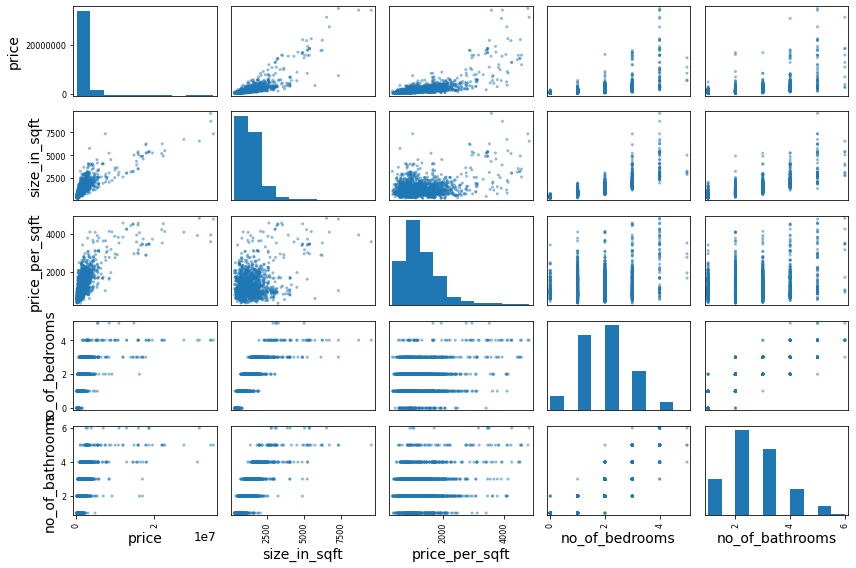

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["price", "size_in_sqft", "price_per_sqft",
              "no_of_bedrooms","no_of_bathrooms"]
scatter_matrix(dubai[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [21]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
id,1.000000,-0.079793,0.023674,-0.037275,-0.032384,-0.117508,-0.009416,-0.021195,0.054763,0.036139,0.056794,0.000254,0.034540,0.056253,0.125555,0.065699,0.055272,0.074315,-0.010048,0.070141,0.088737,0.009930,0.072490,0.017693,-0.022355,-0.001346,0.007129,0.084479,0.038626,0.041817,0.007757,0.098604,0.079153,0.026760,-0.038724,0.064344
latitude,-0.079793,1.000000,0.605875,0.206775,0.131371,0.409887,0.120502,0.151787,-0.071048,0.020436,-0.069783,-0.160155,-0.039981,-0.043518,-0.096277,-0.188051,0.017690,-0.087567,-0.044721,-0.163877,-0.159009,-0.186167,-0.151379,-0.018952,0.033372,0.057927,0.033964,-0.150560,-0.039661,-0.034198,-0.123442,-0.134471,-0.194115,-0.074854,-0.067958,-0.138666
longitude,0.023674,0.605875,1.000000,-0.015395,-0.068941,0.020590,-0.042741,-0.007589,-0.031372,0.051894,-0.001902,-0.057395,-0.012199,0.072650,0.047056,-0.044856,-0.035455,-0.007132,-0.093787,-0.001007,0.005421,-0.016453,0.026172,0.015334,0.027711,0.006388,-0.005922,0.006030,-0.011842,0.003921,-0.011821,-0.019073,-0.006713,0.012975,-0.238989,0.022663
price,-0.037275,0.206775,-0.015395,1.000000,0.808354,0.705538,0.510942,0.497290,0.109675,0.029904,0.006558,-0.079268,0.026963,0.016365,-0.096506,-0.093513,0.113217,0.011251,-0.021120,-0.100234,0.019678,-0.085427,-0.115898,0.049032,0.089794,0.073879,0.325857,-0.085007,-0.058010,-0.084076,-0.003985,-0.023678,-0.084158,0.015263,0.088400,-0.003760
size_in_sqft,-0.032384,0.131371,-0.068941,0.808354,1.000000,0.347740,0.773436,0.731313,0.268373,0.038762,0.008725,-0.062767,0.010109,-0.009666,-0.075258,-0.076188,0.065095,0.005508,-0.012012,-0.089325,-0.000158,-0.096136,-0.064386,0.069056,0.078381,0.057179,0.256504,-0.069412,-0.092223,-0.106050,-0.017611,0.018052,-0.079820,-0.012311,0.068920,0.010757
price_per_sqft,-0.117508,0.409887,0.020590,0.705538,0.347740,1.000000,0.221931,0.231317,-0.051686,0.000384,-0.011678,-0.122140,0.021549,0.001320,-0.128001,-0.139509,0.152690,-0.019261,-0.006284,-0.145819,-0.044087,-0.107992,-0.224242,0.001870,0.071560,0.062020,0.202213,-0.114153,0.001744,-0.016600,-0.033141,-0.113722,-0.132305,0.009303,0.162436,-0.092872
no_of_bedrooms,-0.009416,0.120502,-0.042741,0.510942,0.773436,0.221931,1.000000,0.850906,0.297390,0.039694,0.002382,-0.044302,0.003031,-0.054914,-0.039567,-0.040910,0.049261,-0.012449,-0.025419,-0.063222,-0.036912,-0.074559,-0.043796,0.000985,0.032634,0.016563,0.098138,-0.086848,-0.083606,-0.062241,-0.047900,0.024650,-0.053469,0.003065,0.045050,0.005820
no_of_bathrooms,-0.021195,0.151787,-0.007589,0.497290,0.731313,0.231317,0.850906,1.000000,0.308627,0.025251,0.018367,-0.013856,0.032881,-0.037899,-0.009434,-0.022043,0.069572,0.004638,0.020019,-0.025124,0.004630,-0.036715,-0.021435,-0.010336,0.029530,0.034376,0.100432,-0.072097,-0.067297,-0.043010,-0.024511,0.044658,-0.007641,0.016530,0.074020,0.048580
maid_room,0.054763,-0.071048,-0.031372,0.109675,0.268373,-0.051686,0.297390,0.308627,1.000000,0.042344,0.193162,0.202309,0.140638,0.154685,0.208019,0.267188,0.140278,0.168944,0.190278,0.238154,0.305985,0.260033,0.189960,0.039290,0.064801,-0.000018,0.045353,0.244326,0.162105,0.150370,0.227152,0.347188,0.300969,0.212149,0.168580,0.312392
unfurnished,0.036139,0.020436,0.051894,0.029904,0.038762,0.000384,0.039694,0.025251,0.042344,1.000000,0.347385,-0.055181,0.336751,0.288033,0.035009,-0.064051,0.101569,0.262162,-0.041562,-0.028274,-0.110300,-0.084886,0.153904,0.055133,0.041834,0.028767,0.083053,0.067770,0.256626,0.368902,-0.070378,-0.035564,-0.096208,0.041331,0.102538,-0.036643


## Prepare the Data for Machine Learning Algorithms

## Create a Test Set

In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dubai, test_size=0.3, random_state=42)

In [23]:
test_set.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
1226,7658042.0,Business Bay,25.183515,55.266670,720000,584.0,1232.88,0.0,NaN,Medium,...,False,False,True,True,False,False,False,False,False,False
111,7267378.0,Business Bay,25.176728,55.271595,610000,458.0,1331.88,0.0,1.0,Low,...,False,False,False,False,False,False,False,False,False,False
1838,7700077.0,Jumeirah Lake Towers,25.079130,55.154713,400888,415.0,966.00,0.0,1.0,High,...,False,True,True,True,False,False,False,True,False,False
1675,7688518.0,Motor City,25.047600,55.248748,1000000,1642.0,609.01,2.0,3.0,Low,...,False,False,True,True,False,False,False,False,False,False
415,7542932.0,Jumeirah Beach Residence,25.076944,55.134135,2950000,1503.0,1962.74,NaN,3.0,Low,...,False,False,True,True,False,False,False,False,True,False


In [24]:
dubai = train_set.drop("price", axis=1) # drop labels for training set
dubai_labels = train_set["price"].copy()

### Clean the Data

In [32]:
#organizing numerical variables:

dubai_num = dubai.iloc[:,0:8]

dubai_num = dubai_num.drop(columns = ['neighborhood'])

dubai_num.head()

,id,latitude,longitude,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
812,7615549.0,25.003730,55.297034,2408.0,498.34,3.0,3.0
141,7338330.0,25.194935,55.282665,2310.0,2380.95,3.0,4.0
1302,7663898.0,25.111822,55.140521,2414.0,1014.91,3.0,4.0
1124,7650810.0,25.051528,55.212972,1592.0,622.41,2.0,3.0
1779,7696907.0,25.033350,55.150016,NaN,443.51,NaN,2.0


In [33]:
# Drop unsuitable variables:
dubai_drop = dubai_num

# Drop ID column:
dubai_drop = dubai_drop.drop(columns = ["id"])

# Now, let's go back to the correlations.

# According to the table above, we have to drop either number of bedrooms or number of bathrooms. Since the former also 
# has a higher correlation with the target variable, we drop the latter:
dubai_drop = dubai_drop.drop(columns = ["no_of_bathrooms"])

# drop size in square feet: 
dubai_drop = dubai_drop.drop(columns = ["size_in_sqft"])


In [34]:
print(dubai_drop.isnull().sum())

latitude           0
longitude          0
price_per_sqft     0
no_of_bedrooms    70
dtype: int64


#### Now, let's deal with the rest of the columns that have missing data

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(dubai_drop)

# check median values calculation
diff = imputer.statistics_ - dubai_drop.median().values
print(diff)
print("median calculation OK")

# imputing medians
X = imputer.transform(dubai_drop)
dubai_imputed_num = pd.DataFrame(X, columns=dubai_drop.columns,
                          index=dubai_drop.index)

[0. 0. 0. 0.]
median calculation OK


In [36]:
print(dubai_imputed_num.isnull().sum())

latitude          0
longitude         0
price_per_sqft    0
no_of_bedrooms    0
dtype: int64


#### Now, that the numerical variables are dealt with, let's move onto the categorical variables

In [45]:
dubai_cat = dubai.iloc[:,1:]
dubai_cat = dubai_cat.drop(columns = ['latitude','longitude','size_in_sqft','price_per_sqft','no_of_bedrooms','no_of_bathrooms'])
dubai_cat.head()

,neighborhood,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
812,Town Square,Medium,False,True,False,False,True,True,True,False,...,False,False,True,True,False,False,False,True,False,False
141,Downtown Dubai,Medium,True,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1302,Palm Jumeirah,Medium,True,True,True,False,True,True,False,False,...,False,True,False,False,False,False,False,True,False,True
1124,Jumeirah Village Circle,Ultra,False,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
1779,Discovery Gardens,Low,False,True,False,False,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [48]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
dubai_cat_encoded = ordinal_encoder.fit_transform(dubai_cat)
dubai_cat_encoded[:]

array([[50.,  2.,  0., ...,  1.,  0.,  0.],
       [15.,  2.,  1., ...,  0.,  1.,  0.],
       [46.,  2.,  1., ...,  1.,  0.,  1.],
       ...,
       [ 2.,  0.,  0., ...,  1.,  0.,  1.],
       [22.,  1.,  0., ...,  0.,  0.,  0.],
       [37.,  2.,  0., ...,  1.,  1.,  1.]])

In [49]:
ordinal_encoder.categories_

[array(['Al Barari', 'Al Barsha', 'Al Furjan', 'Al Kifaf', 'Al Quoz',
        'Al Sufouh', 'Arjan', 'Barsha Heights (Tecom)', 'Bluewaters',
        'Business Bay', 'City Walk', 'Culture Village', 'DAMAC Hills',
        'DIFC', 'Discovery Gardens', 'Downtown Dubai',
        'Dubai Creek Harbour (The Lagoons)', 'Dubai Festival City',
        'Dubai Harbour', 'Dubai Healthcare City', 'Dubai Hills Estate',
        'Dubai Land', 'Dubai Marina', 'Dubai Production City (IMPZ)',
        'Dubai Residence Complex', 'Dubai Silicon Oasis',
        'Dubai South (Dubai World Central)', 'Dubai Sports City',
        'Falcon City of Wonders', 'Green Community', 'Greens',
        'International City', 'Jebel Ali', 'Jumeirah',
        'Jumeirah Beach Residence', 'Jumeirah Golf Estates',
        'Jumeirah Lake Towers', 'Jumeirah Village Circle',
        'Jumeirah Village Triangle', 'Meydan', 'Mina Rashid', 'Mirdif',
        'Mohammed Bin Rashid City', 'Motor City', 'Mudon', 'Old Town',
        'Palm Jumei

### Taking into the account the results of these individual transformations, let's combine them into a pipeline

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

train_set_drop = train_set.drop(columns = ['price','no_of_bathrooms','size_in_sqft','id'])
train_set_drop_num = train_set_drop.select_dtypes(include=[np.number])

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_num_attribs = list(train_set_drop_num)
train_cat_attribs = train_set_drop.select_dtypes(include=["object","bool"]).columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, train_num_attribs),
        ("cat", OrdinalEncoder(), train_cat_attribs),
    ])

# num_tr = num_pipeline.fit_transform(train_set_drop_num)
train_prepared = full_pipeline.fit_transform(train_set_drop)

In [102]:
test_set_drop = test_set.drop(columns = ['price','no_of_bathrooms','size_in_sqft','id'])
test_set_drop_num = test_set_drop.select_dtypes(include=[np.number])

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

test_num_attribs = list(test_set_drop_num)
test_cat_attribs = test_set_drop.select_dtypes(include=["object","bool"]).columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, test_num_attribs),
        ("cat", OrdinalEncoder(), test_cat_attribs),
    ])

test_prepared = full_pipeline.fit_transform(test_set_drop)

## Model Implementation

In [80]:
# get target variable
train_labels = train_set["price"]

#### Linear Regression Model

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lin_reg = LinearRegression()
lin_reg.fit(X, y)
predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(train_labels, predictions)

print("RMSE = ", lin_rmse)
print("MAE = ", lin_mae)

RMSE =  1587216.58031939
MAE =  937605.6713264298


#### Decision Tree Model

In [128]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 5)
tree_reg.fit(train_prepared, train_labels)
predictions2 = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, predictions2)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(train_labels, predictions2)

print("RMSE = ", tree_rmse)
print("MAE = ", tree_mae)

RMSE =  0.0
MAE =  0.0


In [132]:
#possible signs of overfitting ^^^ Feature selection is required (we will use GridSearch for this particular case)

#### Random Forest Model

In [122]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 5)
forest_reg.fit(train_prepared, train_labels)
predictions3 = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, predictions3)
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(train_labels, predictions3)

print("RMSE = ", forest_rmse)
print("MAE = ", forest_mae)

RMSE =  438325.0661899513
MAE =  156145.94825459318


## Cross-Validation

In [123]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [91]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1836299.44961148 1315146.35534564 1129816.96534901 1251439.32380219
 2028467.9809433  1691214.66544479 1216709.31959552 2411648.29381248
 1562442.53024392 1720171.67415896]
Mean: 1616335.6558307286
Standard deviation: 386046.4405398101


In [92]:
tree_scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [1491344.70040739  700778.28566671  794542.28379364 1344580.22386197
 2954754.992872   1539629.79497715 1379280.97326666 2333081.38332696
 1117200.35667607 2058339.60329255]
Mean: 1571353.2598141092
Standard deviation: 662910.4197637056


In [93]:
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1168316.12495676  816202.44731339  601953.50404477  898517.70422344
 1572009.35218215 1196252.86357301  698544.92041339 1760459.01818578
 1069335.18504671 1452608.50162316]
Mean: 1123419.962156256
Standard deviation: 363740.4912057465


## Grid Search

### We will use Grid Search to fine-tune our model and determine the features that are going to be included in the final model

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state = 5)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5),
             param_grid=[{'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
pd.DataFrame(grid_search.cv_results_).head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004711,0.000606,0.000200,4.001617e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.642134e+12,-1.200816e+12,...,-3.804003e+12,1.619427e+12,17,-1.350034e+12,-1.002228e+12,-1.409311e+12,-1.182429e+12,-1.109935e+12,-1.210788e+12,1.505148e+11
1,0.012604,0.000491,0.001000,5.091228e-07,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.985597e+12,-9.390171e+11,...,-2.867789e+12,1.276133e+12,14,-6.794760e+11,-4.934783e+11,-5.743303e+11,-5.563953e+11,-4.969519e+11,-5.601264e+11,6.766534e+10
2,0.036008,0.000633,0.003201,3.997803e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.405133e+12,-8.220484e+11,...,-2.486270e+12,1.115989e+12,11,-4.679827e+11,-4.274866e+11,-3.356805e+11,-3.391771e+11,-3.018603e+11,-3.744374e+11,6.257439e+10
3,0.004626,0.000512,0.000775,3.906082e-04,3,3,NaN,"{'max_features': 3, 'n_estimators': 3}",-4.260416e+12,-2.866959e+12,...,-3.823188e+12,5.919175e+11,18,-1.059920e+12,-1.035709e+12,-1.214589e+12,-1.115242e+12,-1.075062e+12,-1.100104e+12,6.280853e+10
4,0.013203,0.000400,0.001000,3.814697e-07,3,10,NaN,"{'max_features': 3, 'n_estimators': 10}",-2.268506e+12,-1.122094e+12,...,-2.344064e+12,6.976495e+11,9,-4.494930e+11,-4.752073e+11,-4.577459e+11,-4.765633e+11,-3.794811e+11,-4.476981e+11,3.563061e+10


In [97]:
grid_search.best_estimator_


RandomForestRegressor(max_features=5, n_estimators=30, random_state=5)

### Using the acquired information, let us build the final model 

## Final Model

In [105]:
# Use the grid search results:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_prepared)
text_Y = test_set["price"]

final_mse = mean_squared_error(text_Y, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE = ", final_rmse)

Final RMSE =  1549721.249383121


In [107]:
from scipy import stats

# compute a 95% confidence interval for the test RMSE
confidence = 0.95
squared_errors = (final_predictions - text_Y) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([  38185.7810503 , 2191304.12031391])

## This concludes the project. Thank you for following along, cheers!